
# CFG Python Challenge
<hr>
<br>

<i><b>Challenge Summary</b></i>: Imagine you work for a small company that sells products online. Your manager has asked you to analyse the sales data from the past year to determine which products are the best selling. You have also been asked to identify any trends in customer purchasing behaviour. 

Task is:
* A. Use Pandas to read in the sales data from the CSV file provided in the “student materials” folder on Slack (sales_dataset.csv)
* B. Calculate the total sales for each product 
* C. Determine the average sale price for each product category 
* D. Identify the month with the highest sales and the month with the lowest sales
* E. Determine which customers made the most purchases and how much they spent in total
* F. Write the results of your analysis as a CSV file


## Part I : Obtain the data from the provided csv file and provide key summary of the dataset

<span style="color:red">
<b>A. Read the dataset using pandas. </b>
</span>

In [391]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

data_file='data/sales_dataset.csv'
data=pd.read_csv(data_file)
data.dtypes

Product Name      object
Category          object
Sale Price       float64
Quantity Sold      int64
Month             object
Customer Name     object
dtype: object

There are 6 columns and four have double names. We are going to modify columns names to avoid null values.

In [392]:

data_file='data/sales_dataset.csv'
data=pd.read_csv(data_file)
data.rename(columns={"Product Name":"ProductName", 
                     "Sale Price":"SalePrice",
                     "Quantity Sold":"QuantitySold",
                     "Customer Name":"CustomerName"}, inplace=True)

data.head(7)

,ProductName,Category,SalePrice,QuantitySold,Month,CustomerName
0,T-shirts,Clothing,10.99,20,December,John Smith
1,Levi's Jeans,Clothing,59.99,18,April,Samantha Davis
2,Dyson Vacuum,Home,599.99,2,August,David Williams
3,Sunglasses,Accessories,21.22,15,May,Kelly Williams
4,Headphones,Electronics,8.99,40,October,Chris Brown
5,Water bottles,Accessories,14.14,22,August,Amy Lee
6,Backpacks,Accessories,18.99,27,July,William Smith


Categorical Data Overview:
* There are 33 all unique objects being sold.
* There are 11 unique categories.
* There are 16 customers in the dataset.
* Last categorical columns: 11 months, January is missing.

In [393]:
print("ProductName total products: ", len(data['ProductName'].unique()), "; \nCategory unique counts \n", data['Category'].value_counts(),
"; \nCustomerName number of unique names: ", len(data['CustomerName'].value_counts()))

ProductName total products:  33 ; 
Category unique counts 
 Electronics    8
Accessories    6
Clothing       4
Home           3
Fitness        3
Media          2
Home decor     2
Kitchen        2
Toys           1
Food           1
Outdoor        1
Name: Category, dtype: int64 ; 
CustomerName number of unique names:  16


Numerical Data Overview:
* SalePrice: minimum price 3.49 and maximum price 1299.99, with average price of 221.59
* QuantitySold: minimum number sold 1 unit, maximum number sold 40 units, with average number of sold units 15.

In [394]:
round(data.describe(),2)

,SalePrice,QuantitySold
count,33.00,33.00
mean,221.59,15.00
std,307.98,11.22
min,3.49,1.00
25%,17.99,4.00
50%,89.99,15.00
75%,349.99,24.00
max,1299.99,40.00


<hr>
<span style="color:red">
<b>B. Calculate the total sales for each product </b>
</span>

In [395]:
data['TotalSale']=data['SalePrice']*data['QuantitySold']
data.head(7)

,ProductName,Category,SalePrice,QuantitySold,Month,CustomerName,TotalSale
0,T-shirts,Clothing,10.99,20,December,John Smith,219.80
1,Levi's Jeans,Clothing,59.99,18,April,Samantha Davis,1079.82
2,Dyson Vacuum,Home,599.99,2,August,David Williams,1199.98
3,Sunglasses,Accessories,21.22,15,May,Kelly Williams,318.30
4,Headphones,Electronics,8.99,40,October,Chris Brown,359.60
5,Water bottles,Accessories,14.14,22,August,Amy Lee,311.08
6,Backpacks,Accessories,18.99,27,July,William Smith,512.73


<i>Observation notes on top 3 and bottom 3 sales and cutomer names per product names:</i> 
* the higest priced purchase was made by Jane Doe, and item in the Electronics category, for $4499.95
* the lowest priced purchase was made by Kevin Lee, an item from Home Decor category, for $66.31

In [396]:
data[['ProductName','Category','CustomerName','TotalSale']].sort_values(by='TotalSale', ascending=False).head(5)

,ProductName,Category,CustomerName,TotalSale
12,Samsung Galaxy,Electronics,Jane Doe,4499.95
13,iPhone 13,Electronics,Mark Johnson,3899.97
11,Lawn mower,Outdoor,Samantha Davis,2975.76
24,Michael Kors Handbag,Accessories,Jane Doe,2799.92
23,Sony PlayStation 5,Electronics,John Smith,1999.96


In [397]:

data[['ProductName','Category','CustomerName','TotalSale']].sort_values(by='TotalSale', ascending=True).head(5)

,ProductName,Category,CustomerName,TotalSale
16,Candles,Home decor,Kevin Lee,66.31
15,Picture frames,Home decor,Sarah Anderson,83.98
8,Books,Media,Robert Johnson,215.82
0,T-shirts,Clothing,John Smith,219.80
21,Phone cases,Electronics,Mark Johnson,301.00


<hr>

<span style="color:red">
<b>C. Determine the average sale price for each product category.</b>
</span>

<i>Observational notes:</i> 
* the lowest average sale price is actually shown in Food category, with the Home Decor on the 4th position;
* the highest average sale price is in the Electronics category, which supports the highest TotalSale noted earlier.
* distribution of the average prices is skewed, with 25% top values being as widely spread as the rest 75% bottom ones (see boxplot). 
* in addition, the overview of the Total Sale per category has been visualized to confirm that Electronics is tge most profitable category.

In [398]:
avg_category_table=data[['Category', 'SalePrice']]
avg_category_table=round(avg_category_table.groupby('Category'). mean().sort_values('SalePrice'), 2)
avg_category_table.rename(columns={'SalePrice':'AvgPriceCategory'}, inplace=True)
avg_category_table

,AvgPriceCategory
Category,
Food,10.99
Media,13.99
Toys,17.99
Home decor,22.74
Clothing,55.24
Accessories,97.39
Outdoor,123.99
Kitchen,164.99
Fitness,246.66


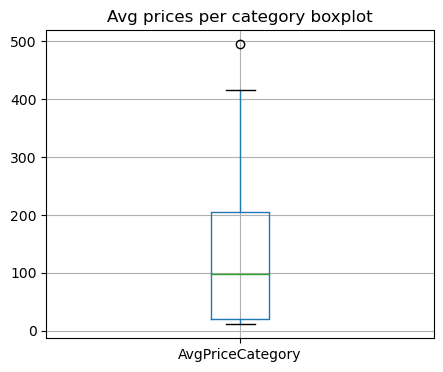

In [399]:
avg_category_table.boxplot(figsize=(5, 4))
plt.title('Avg prices per category boxplot')
plt.show()

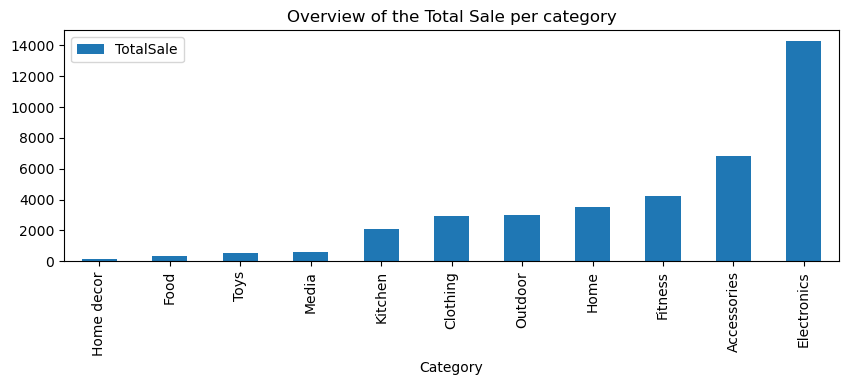

In [400]:
# maximum spent in each category
df=data[['Category', 'TotalSale']].groupby('Category').sum().sort_values('TotalSale').reset_index()
df.plot.bar(x='Category', y='TotalSale', figsize=(10,3))
plt.title('Overview of the Total Sale per category')
plt.show()

<hr>

<span style="color:red">
<b>D. Identify the month with the highest sales and the month with the lowest sales.</b>
</span>

<i>Observational notes:</i>
* Highest Sales took place in February and December, with no sales noted in January.
* Month with the lowest sales is October.
* At the quick glance, more TotalSales were made during autumn and winter months (not including January), than in other part of the year.

In [401]:
monthly_table=data[['Month', 'TotalSale']]
monthly_table=round(monthly_table.groupby('Month'). sum().sort_values('TotalSale'), 2)
new_order = ['January', 'February ', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_table = monthly_table.reindex(new_order, axis=0)
monthly_table.rename(columns={'TotalSale':'TotalSaleMonth'}, inplace=True)
monthly_table

,TotalSaleMonth
Month,
January,NaN
February,6499.66
March,2315.52
April,3229.65
May,1339.24
June,1851.62
July,5112.53
August,2395.03
September,3899.53


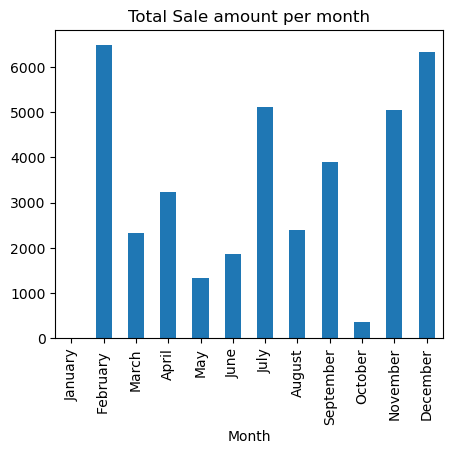

In [402]:
monthly_table['TotalSaleMonth'].plot.bar(figsize=(5, 4))
plt.title('Total Sale amount per month')
plt.show()

<hr>

<span style="color:red">
<b>E. Determine which customers made the most purchases and how much they spent in total.</b>
</span>


<i>Observational notes:</i>
* Customers that made the most number of purchases: Michael Johnson, R. Johnson, J. Smith, S. Davis.
* Top 3 customers that spent the most money: J.Doe, S. Davis, Mark Johnson
* Key statistical values: mean= 2399.10; St.Dev= 1850.50, right(positive) skewed distribution (see plot)
* According to box and whisker plot below, J.Doe and S.Davis are also two outliers, 
persons that spent more than the main statistical average of the group (significantly differ to the rest 14 customers)

In [403]:
customer_table=data[['CustomerName', 'TotalSale']]
customer_df=customer_table.groupby('CustomerName').agg(['count','sum']).reset_index()
customer_df.columns=['CustomerName','TotalPurchasesCustomer','TotalSpentCustomer']
customer_df.sort_values('TotalSpentCustomer', ascending=False).reset_index(drop=True)


,CustomerName,TotalPurchasesCustomer,TotalSpentCustomer
0,Jane Doe,2,7299.87
1,Samantha Davis,3,4855.54
2,Mark Johnson,2,4200.97
3,Michael Johnson,3,3201.56
4,John Smith,3,2619.51
5,Robert Johnson,3,2535.72
6,Kimberly White,2,2321.59
7,Elizabeth Brown,2,2299.93
8,David Williams,2,1999.96
9,Emily Davis,2,1849.45


In [404]:
round(customer_df['TotalSpentCustomer'].describe(), 2)

count      16.00
mean     2399.10
std      1850.05
min        66.31
25%      1547.32
50%      2149.95
75%      2765.02
max      7299.87
Name: TotalSpentCustomer, dtype: float64

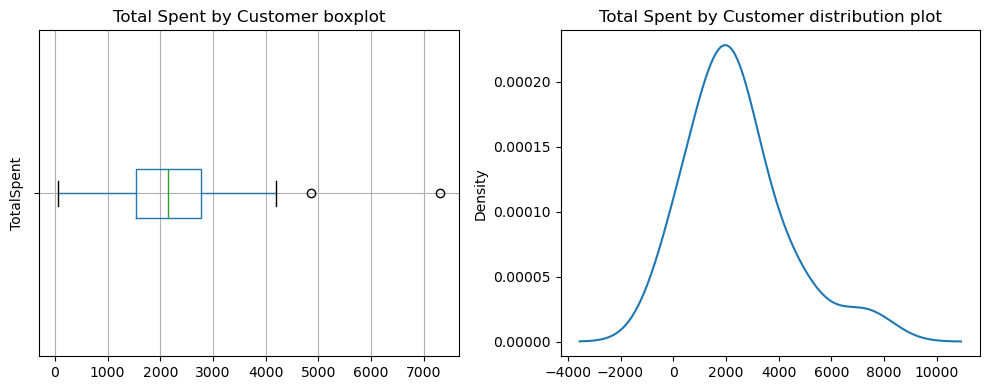

In [405]:
#to visualise statistical data
fig = plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
customer_df.boxplot('TotalSpentCustomer', vert=False)
plt.title('Total Spent by Customer boxplot')
plt.yticks([1], [''])
plt.ylabel('TotalSpent', rotation=90,fontsize=10)

plt.subplot(1, 2, 2)
customer_df['TotalSpentCustomer'].plot(kind='kde')
plt.title('Total Spent by Customer distribution plot')

plt.tight_layout()
plt.show()

<hr>

# Part II: Result

<span style="color:red">
<b>F. Write the results of your analysis as a CSV file.</b>
</span>

There are 4 data frames that have to be combined back into one table to be recorded as CSV file:
* original: data
* average per category: avg_category_table
* customer data: customer_df
* monthly data: monthly_table


In [406]:
#create new columns
data['AvgPriceCategory']=0.0
data['TotalSaleMonth']=0.0
data['TotalPurchasesCustomer']=0
data['TotalSpentCustomer']=0.0

#update AvgPriceCategory column in the main dataframe from avg_category_table
data.set_index('Category', inplace=True)
data['AvgPriceCategory'].update(avg_category_table['AvgPriceCategory'])
data.reset_index(inplace=True)

#update TotalSaleMonth column in the main dataframe from monthly_table
data.set_index('Month', inplace=True)
data['TotalSaleMonth'].update(monthly_table['TotalSaleMonth'])
data.reset_index(inplace=True)

#update TotalePurchases and TotalSpent columns from customer table
data.set_index('CustomerName', inplace=True)
customer_df.set_index('CustomerName', inplace=True)
data['TotalPurchasesCustomer'].update(customer_df['TotalPurchasesCustomer'])
data['TotalSpentCustomer'].update(customer_df['TotalSpentCustomer'])
data.reset_index(inplace=True)

#rearrange columns order to appear more organized
data=data[['ProductName','SalePrice','QuantitySold','TotalSale','Category','AvgPriceCategory',
          'Month','TotalSaleMonth', 'CustomerName','TotalPurchasesCustomer','TotalSpentCustomer']]
data.head(5)

,ProductName,SalePrice,QuantitySold,TotalSale,Category,AvgPriceCategory,Month,TotalSaleMonth,CustomerName,TotalPurchasesCustomer,TotalSpentCustomer
0,T-shirts,10.99,20,219.80,Clothing,55.24,December,6341.14,John Smith,3,2619.51
1,Levi's Jeans,59.99,18,1079.82,Clothing,55.24,April,3229.65,Samantha Davis,3,4855.54
2,Dyson Vacuum,599.99,2,1199.98,Home,416.66,August,2395.03,David Williams,2,1999.96
3,Sunglasses,21.22,15,318.30,Accessories,97.39,May,1339.24,Kelly Williams,2,1668.15
4,Headphones,8.99,40,359.60,Electronics,495.12,October,359.60,Chris Brown,2,1659.50


In [407]:

#upload as CSV file
data.to_csv('data/updated_sales_dataset.csv', index=False)

<hr>

# Part III: Conclusion/ Analysis

* The yearly data is missing January, which can be important for the overall analysis, however even without this data it can be observed that Fall and Winter tend to have more online sales vs. Summer or Spring.

* The top three dedicated customers are Jane Doe, Samantha Davis, Mark Johnson. With the first one being an extreme outlier from the whole dataset.

* Electronics as a category tends to bring significantly highest income, possibly due to the highest average unit price. The items from that category had been purchased 18 times over last year. Followed by Accessories and Clothing. (<i>see footnote table</i>)

* Home decor, food, toys, media are the least financially beneficial categories. They have beem used only two or three times last year. It will be thoughtful to reconsider these categories: drop/modify them. (<i>See footnote table</i>)

* Item that brought in the most income from last year: Samsung Galaxy, from Electronics, sold 5 units (899.99) in February, which made February to be the month of the highest income.

* Item that brough in the least income from last year: Candles, from Home Decor Category, sold 19 units (3.49)

<b>NOTE:</b> The dataset provided, does not specify if products were sold through the year and recorded only once, or the shop is selling different items at different time, or perhaps each product is only avaliable once for purchase.

<hr>
##Footnote Table:

In [408]:
#Category vs Total number of purchases.
df=data[['Category', 'TotalPurchasesCustomer']]
df.groupby('Category').sum().reset_index().sort_values('TotalPurchasesCustomer', ascending=False)

,Category,TotalPurchasesCustomer
2,Electronics,18
0,Accessories,11
1,Clothing,11
3,Fitness,8
5,Home,6
8,Media,6
7,Kitchen,5
4,Food,3
9,Outdoor,3
6,Home decor,2
